In [82]:
%pylab inline
from pygadgetreader import *
from astropy import constants
from astropy import units as u
import biff
from octopus import CM

Populating the interactive namespace from numpy and matplotlib


In [66]:
pos_LMC = readsnap('../../data/ICs/LMC/LMC1-97k/LMC1_97K_vir_100', 'pos', 'dm')
vel_LMC = readsnap('../../data/ICs/LMC/LMC1-97k/LMC1_97K_vir_100', 'vel', 'dm')
mass_LMC = readsnap('../../data/ICs/LMC/LMC1-97k/LMC1_97K_vir_100', 'mass', 'dm')
pid_LMC = readsnap('../../data/ICs/LMC/LMC1-97k/LMC1_97K_vir_100', 'pid', 'dm')
pot_LMC = readsnap('../../data/ICs/LMC/LMC1-97k/LMC1_97K_vir_100', 'pot', 'dm')

Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Potential


In [67]:
G_c = constants.G
G_c = G_c.to(u.kiloparsec**3 / (u.s**2 * u.Msun)) # 
pot_factor = G_c/43007.1 *1E10

pot_LMC = pot_factor.value * pot_LMC

In [81]:
def biff_potential(pos, S, T, n,l,m):
    S_new = np.zeros(shape(S))
    T_new = np.zeros(shape(T))
    S_new[n,l,m] = S[n,l,m]
    T_new[n,l,m] = T[n,l,m]
    pot_nlm = biff.potential(pos.astype(double), S_new, T_new, G=G_c.value, M=1, r_s=3)
    #r = np.sqrt(pos[:,0]**2 + pos[:,1]**2 + pos[:,2]**2)
    #indexes = argsort(r)
    return pot_nlm

def re_center(pos, cm):
    """
    Re center a halo to its center of mass.
    """
    for i in range(3):
        pos[:,i] = pos[:,i] - cm[i]
    return pos


In [84]:
pos_cm, vel_cm = CM(pos_LMC, vel_LMC)

In [102]:
pos_cm

array([-2.07338468, -0.53702881,  1.5041449 ])

In [87]:
pos_centered = re_center(pos_LMC, pos_cm)

In [24]:
def scatter_slice(pos, pot, zmin, zmax):
    """
    Slices the 3d cartessian grid along the z-coordinate.
    
    """
    index = np.where((pos[:,2]<zmax) & ((pos[:,2]>zmin)) & (pos[:,0]>-50) & (pos[:,0]<50) & (pos[:,1]>-50) & (pos[:,1]<50))
    return pos[index], pot[index]
    

In [88]:
pos_slide, pot_slide = scatter_slice(pos_centered, pot_LMC, -5, 5)

In [89]:
S0, T0 = biff.compute_coeffs_discrete(np.ascontiguousarray(pos_centered.astype(double)), mass_LMC.astype(double)*1E10, 10, 10, 3)

In [96]:
pot_biff_all_LMC = biff.potential(ascontiguousarray(pos_centered.astype(double)), S0, T0, G=G_c.value, M=1, r_s=3)


In [97]:
pos_slide, pot_slide = scatter_slice(pos_centered, pot_LMC, -5, 5)
pos_slide_biff, pot_slide_biff = scatter_slice(pos_centered, pot_biff_all_LMC, -5, 5)

In [127]:
dif_pot = np.abs(np.abs(pot_LMC) - np.abs(pot_biff_all_LMC))/np.abs(pot_LMC)

pos_slide_diff, pot_slide_diff = scatter_slice(pos_LMC, dif_pot, -5, 5)


In [128]:
sum(dif_pot)

9847.835673662481

In [100]:
sum(dif_pot)

9847.835673662481

In [129]:
def dif_potentials(pos, mass, nbody_pot, nmax, lmax, r_s):
    S, T = biff.compute_coeffs_discrete(np.ascontiguousarray(pos.astype(double)), mass.astype(double)*1E10, nmax, lmax, r_s)
    pot_biff = biff.potential(ascontiguousarray(pos_centered.astype(double)), S, T, G=G_c.value, M=1, r_s=3)
    dif_pot = np.abs(np.abs(nbody_pot) - np.abs(pot_biff))/np.abs(nbody_pot)
    return sum(dif_pot)


    

In [130]:
dif_pots = np.zeros((20, 10))
for i in range(1,21):
    for j in range(1,11):
        dif_pots[i-1][j-1] = dif_potentials(pos_centered, mass_LMC, pot_LMC, i, j, 3)
        print(i,j)

1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
14 1
14 2
14 3
14 4
14 5
14 6
14 7
14 8
14 9
14 10
15 1
15 2
15 3
15 4
15 5
15 6
15 7
15 8
15 9
15 10
16 1
16 2
16 3
16 4
16 5
16 6
16 7
16 8
16 9
16 10
17 1
17 2
17 3
17 4
17 5
17 6
17 7
17 8
17 9
17 10
18 1
18 2
18 3
18 4
18 5
18 6
18 7
18 8
18 9
18 10
19 1
19 2
19 3
19 4
19 5
19 6
19 7
19 8
19 9
19 10
20 1
20 2
20 3
20 4
20 5
20 6
20 7
20 8
20 9
20 10


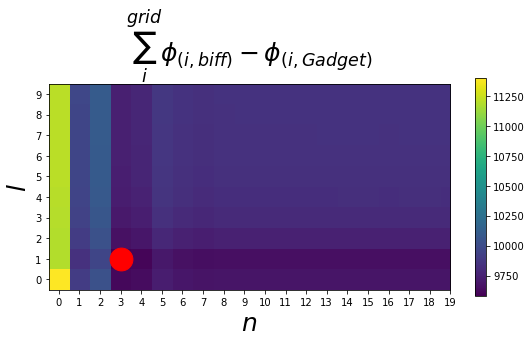

In [205]:
figure(figsize=(9,4))
imshow(dif_pots.T, origin='lower')
colorbar()
xlim(-0.5, 19)
plt.xticks((arange(0, 20)))
plt.yticks((arange(0, 10)))
xlabel('$n$', fontsize=25)
ylabel('$l$', fontsize=25)
scatter(3, 1, s=520, c='r', facecolor=None)
title('$\sum_i^{grid} \phi_{(i,biff)} - \phi_{(i,Gadget)}$', fontsize=25,  y=1.08)
savefig('potential_dif_Ncoeff_dep.pdf', dpi=300, bbox_inches='tight')

In [190]:
min_pot = where(dif_pots<9600)
min_pot


(array([3]), array([1]))

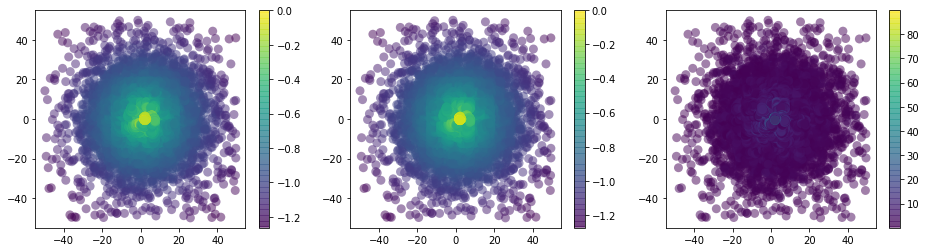

In [101]:
figure(figsize=(16,4))

subplot(1, 3, 1)
scatter(pos_slide[:,0], pos_slide[:,1], c = np.log10(np.abs(pot_slide)/np.max(np.abs(pot_slide)))
        , edgecolors='None', s=80, alpha=0.5)
colorbar()

subplot(1, 3, 2)
scatter(pos_slide_biff[:,0], pos_slide_biff[:,1], c = np.log10(np.abs(pot_slide_biff)/np.max(np.abs(pot_slide_biff)))
        , edgecolors='None', s=80, alpha=0.5)
colorbar()

subplot(1, 3, 3)
scatter(pos_slide_diff[:,0], pos_slide_diff[:,1], c = pot_slide_diff*100, edgecolors='None', s=80, alpha=0.5)
colorbar()